In [45]:
import rawio 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cdms
from ROOT import *
import cats
from CDMSDataCatalog import CDMSDataCatalog

In [48]:
# Testing 
series="23240305_153453"
filepath = CDMSDataCatalog().findData(
    Facility    = "CUTE",
    nFridgeRun  = 38,
    Series      = "23240305_153453",
    ProdTag     = "Prompt_V05-00_P0.2.2/",
    nMergeLevel = 1,
    dofetch     = True
)
filepath = [x.filePath for x in filepath]
det = "2"
df = cats.cdataframe.CDataFrame("rqDir/zip"+det, filepath, friends = [[x+":rqDir/eventTree" for x in filepath]])
df = df.Filters(["TriggerType==1", "TriggerDetectorNum =="+det, "PTOFamps>1e-6", "PTOFamps<1.6e-5", "PTOFchisqLF>600", "PTOFchisqLF<6e3"])

df1 = df.Filters(["PTOFamps<2.5e-6", "PTOFchisqLF<1.4e3", "PTOFamps>2e-6"])
df2 = df.Filters(["PTOFamps>4e-6", "PTOFamps<1e-5", "PTOFchisqLF<4e3"])
df3 = df.Filters(["PTOFamps>1.4e-5", "PTOFchisqLF<5e3", "PTOFchisqLF>3500", "PTOFamps<1.55e-5"])

In [49]:
# plotting amp vs. chisqlf
%jsroot on
c1 = TCanvas("c1", "amp chisq", 800, 500)
#h = df3.Histo2D(("hist", "PTOFchisqLF vs. PTOFamps Det "+det, 100, 1e-6, 1.6e-5, 100, 600, 6e3), "PTOFamps", "PTOFchisqLF")
h = df3.Histo2D(("hist", "PTOFchisqLF vs. PTOFamps Det "+det, 100, 1e-6, 16e-6, 100, 600, 9e3), "PTOFamps", "PTOFchisqLF")
h.Draw("COLZ")
h.SetXTitle("PTOFamps [A]")
h.SetYTitle("LF chisq")
c1.SetLogz()
# c1.SetLogy()
# c1.Print("amp_chisq_"+det+".png")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [170]:
filepath = CDMSDataCatalog().findData(
    Facility    = "CUTE",
    nFridgeRun  = 38,
    Series      = series,
    ProdStep    = 'BatNoise',
    dofetch     = True
)[0].filePath
file = TFile(filepath, "READ")
chan="PAS1"
p= file.Get('zip'+det+'/'+chan+'NoiseFFTsq') 
c1 = TCanvas("c1", "amp chisq", 800, 500)
p.Draw()
c1.SetLogx()
c1.SetLogy()
c1.Draw()
len(p)

32770

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [50]:
series="23240305_153453"
det = "2"

In [51]:
# getting raw events 
#df1.AsNumpy(columns=["EventNumber"])["EventNumber"]

# events chosen in region A and C
event_list_a = [82612, 300426, 591890, 660876]
event_list_c = [150653, 530888, 661457, 671408]

chan="PAS1"

# getting traces
raw_path = '/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw'

myreader = rawio.RawDataReader(filepath=raw_path, series=series)
raw_events = myreader.read_events(output_format=1, skip_empty=True, 
                              trigger_types =[1], event_nums=event_list_a,
                              detector_nums = [int(det)], channel_names=chan)

INFO: Found 68 midas raw data files
The file is: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw/23240305_153453/23240305_153453_F0008.mid.gz

Opened raw midas file: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw/23240305_153453/23240305_153453_F0008.mid.gz
The file is: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw/23240305_153453/23240305_153453_F0030.mid.gz

Opened raw midas file: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw/23240305_153453/23240305_153453_F0030.mid.gz
The file is: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw/23240305_153453/23240305_153453_F0059.mid.gz

Opened raw midas file: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw/23240305_153453/23240305_153453_F0059.mid.gz
The file is: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw/23240305_153453/23240305_153453_F0066.mid.gz

Opened raw midas file: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw/23240305_153453/23240305_153453_F0066.mid.gz


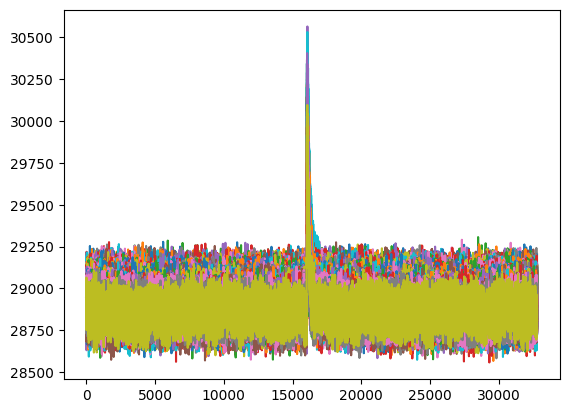

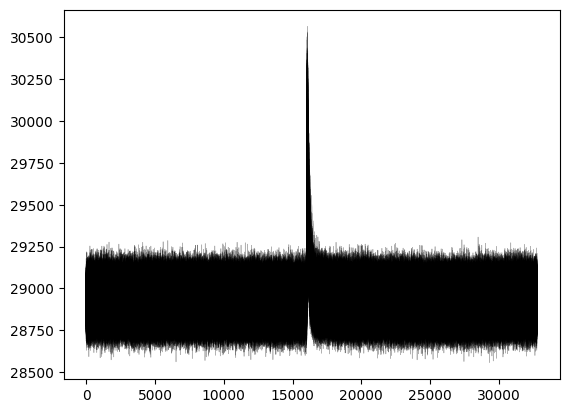

In [35]:
# raw traces in Region A
for event in [int(i) for i in df1.AsNumpy(columns=["EventNumber"])["EventNumber"]]:
    plt.plot(raw_events['Z'+det][chan][int(series)][event])
plt.show()

for event in [int(i) for i in df1.AsNumpy(columns=["EventNumber"])["EventNumber"]]:
    plt.plot(raw_events['Z'+det][chan][int(series)][event], color='black', linewidth=0.5, alpha=0.3)
plt.show()

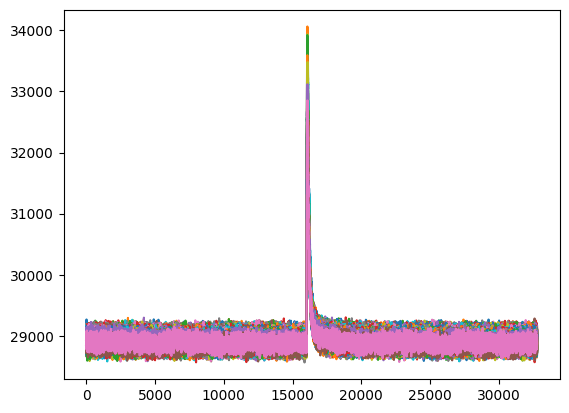

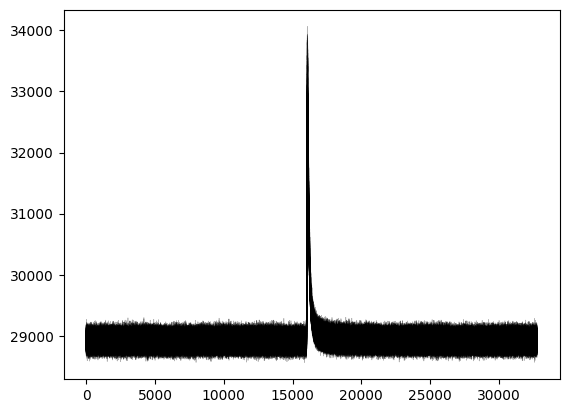

In [43]:
# raw traces in Region C
for event in [int(i) for i in df3.AsNumpy(columns=["EventNumber"])["EventNumber"]]:
    plt.plot(raw_events['Z'+det][chan][int(series)][event])
plt.show()

for event in [int(i) for i in df3.AsNumpy(columns=["EventNumber"])["EventNumber"]]:
    plt.plot(raw_events['Z'+det][chan][int(series)][event], color='black', linewidth=0.5, alpha=0.3)
plt.show()

In [ ]:
from scipy.fft import fft, fftfreq

# get path to filter file
filepath = CDMSDataCatalog().findData(
    Facility    = "CUTE",
    nFridgeRun  = 38,
    Series      = series,
    ProdStep    = 'BatNoise',
    dofetch     = True
)[0].filePath

chan_names = ['PAS1', 'PBS1', 'PCS1', 'PDS1', 'PES1', 'PFS1','PAS2', 'PBS2', 'PCS2', 'PDS2', 'PES2', 'PFS2']

# getting noise psd
file = TFile(filepath, "READ")
psd = file.Get('zip'+det+'/'+chan+'NoiseFFTsq') 

#x = np.linspace(psd.GetXaxis().GetXmin(), psd.GetXaxis().GetXmax(), psd.GetNbinsX())

# noisefftsq in A^2/Hz
psd_arr = np.array(psd)[1:-1] # removing overflow and underflow bins
psd_arr[psd_arr == 0] = np.inf # to not divide by zero later


# getting template
file = TFile(filepath, "READ")
temp= file.Get('zip'+det+'/'+chan+'TemplateTime')
temp_arr = np.array(temp)[1:-1]

# getting the amplitude associated with the trace
det = "2"

# getting path to RQ root file
filepath = CDMSDataCatalog().findData(
    Facility    = "CUTE",
    nFridgeRun  = 38,
    Series      = series,
    ProdTag     = "Prompt_V05-00_P0.2.2/",
    nMergeLevel = 1,
    dofetch     = True
)[0].filePath

# event_list_a = [82612, 300426, 591890, 660876, 150653, 530888, 661457, 671408]

df = cats.cdataframe.CDataFrame("rqDir/zip"+det, filepath, friends = [[filepath+":rqDir/eventTree"]])
df = df.Filters(["EventNumber == "+str(event_list_a[1])]) # choose a particular trace

# get the relevant quantities needed
column = df.AsNumpy(columns=[chan+"OFamps", chan+"norm", chan+"OFdelay", chan+'OFchisq'])
amp = column[chan+"OFamps"]
norm = column[chan+"norm"]
delay = column[chan+'OFdelay']
chisq = column[chan+'OFchisq']

#temp_arr = np.roll(temp_arr, round(delay[0]*625000))

# perform ffts
trace_fft = fft((raw_events['Z'+det][chan][int(series)][event_list_a[1]])/norm[0], norm="forward")
temp_fft = fft(temp_arr, norm="forward")

# get frequency array of size 32768 with a spacing defined by sampling rate 1/625000
x = fftfreq(temp_arr.size, 1.6e-6)

# perform chisquared calculation
chi2a = (abs(trace_fft-amp[0]*temp_fft*np.exp(-1j*2*np.pi*x*delay[0]))**2)/(psd_arr)
#chi2c = (abs(trace_fft-amp[0]*temp_fft*np.exp(-1j*2*np.pi*x*delay[0]))**2)/psd_arr
print(sum(chi2a[:]), chisq)

# chi = 0
# chi2c = []
# for i in range(len(x)):
#     value = (trace_fft[i] - amp[0]*np.exp(-1j*2*np.pi*x[i]*delay[0])*temp_fft[i])
#     numerator = abs(value)**2
#     chi2c.append(numerator/psd_arr[i])
#     if x[i] <= 10000:
#          chi += numerator/psd_arr[i]

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, 'S/J Real Component')

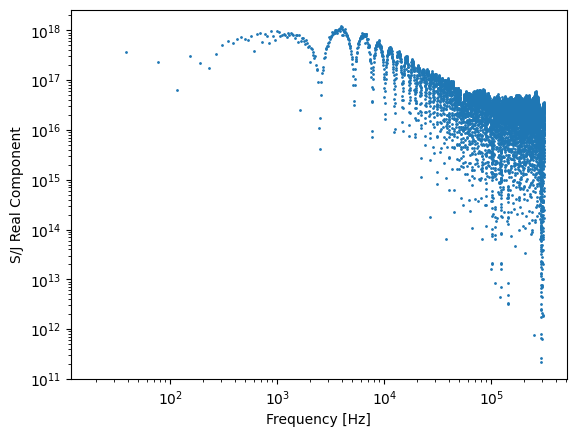

In [54]:
plt.scatter(x,temp_fft/psd_arr, s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('S/J Real Component')

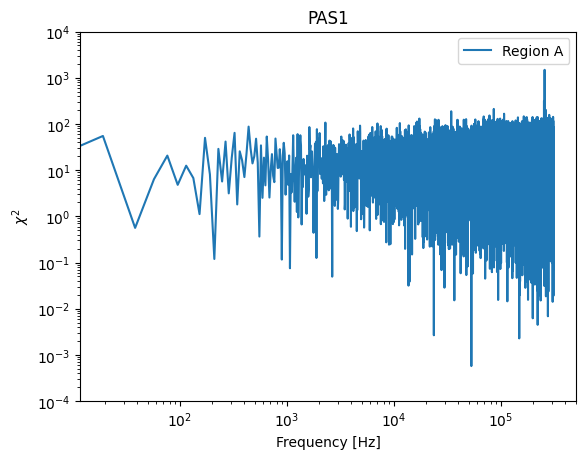

In [56]:
# plotting the positive frequencies vs. chisq
plt.plot(x[0:x.size//2], chi2a[0:chi2a.size//2], label='Region A')
#plt.plot(x[0:x.size//2], chi2c[0:chi2c.size//2], label='Region C')
plt.xscale('log')
plt.yscale('log')
plt.ylim([0.0001,1e4])
plt.title(chan)
plt.xlabel("Frequency [Hz]")
plt.ylabel('$\chi^2$')
plt.legend()
plt.show()

In [57]:
borr = [10016., 10088., 10090., 10091., 10125., 10236., 10241., 10325.,
         10392., 10443., 10516., 10526., 10771., 10774., 20044., 20080.,
         20310., 20356., 20372., 20460., 20467., 20577., 20684., 20697.,
         20768., 20811., 20819.]
raw_path = '/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw'

myreader = rawio.RawDataReader(filepath=raw_path, series=series)
raw_events = myreader.read_events(output_format=1, skip_empty=True, 
                              trigger_types =[2], event_nums=[int(i) for i in borr])

INFO: Found 68 midas raw data files
The file is: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw/23240305_153453/23240305_153453_F0001.mid.gz

Opened raw midas file: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw/23240305_153453/23240305_153453_F0001.mid.gz
The file is: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw/23240305_153453/23240305_153453_F0002.mid.gz

Opened raw midas file: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R38/Raw/23240305_153453/23240305_153453_F0002.mid.gz


In [64]:
chan = "PAS1"
filepath = CDMSDataCatalog().findData(
    Facility    = "CUTE",
    nFridgeRun  = 38,
    Series      = series,
    ProdTag     = "Prompt_V05-00_P0.2.2/",
    nMergeLevel = 1,
    dofetch     = True
)[0].filePath

pulse_fft = []
for event in borr:
    df = cats.cdataframe.CDataFrame("rqDir/zip"+det, filepath, friends = [[filepath+":rqDir/eventTree"]])
    df = df.Filters(["EventNumber == "+str(int(event))])
    column = df.AsNumpy(columns=[chan+"OFamps", chan+"norm"])
    amp = column[chan+"OFamps"]
    norm = column[chan+"norm"]
    trace = raw_events['Z'+det][chan][int(series)][event]/norm[0]
    pulse_fft.append(abs(fft(trace, norm="forward"))**2)
pulse_fft = np.mean(pulse_fft,0)
freq = fftfreq(pulse_fft.size, 1.6e-6)

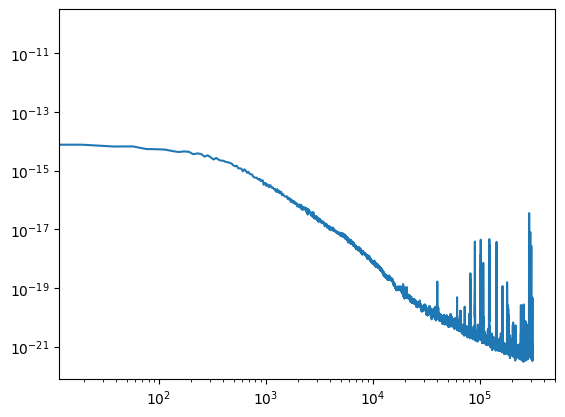

In [65]:
plt.plot(freq[0:freq.size//2], pulse_fft[0:pulse_fft.size//2])
plt.xscale('log')
plt.yscale('log')